In [24]:
import os
import json
import pandas as pd
from docx import Document

In [25]:
data_folder = '/home/hashim/Flight-Delay-Time-Prediction-using-Ensemble-Learning/data'

# List to store each flight's data
flight_data = []

# Function to extract and parse the content from a .docx file
def extract_data_from_docx(file_path):
    doc = Document(file_path)
    content = ''
    
    # Extract text from all paragraphs in the document
    for para in doc.paragraphs:
        content += para.text
    
    # Parse the extracted content assuming it contains JSON-like data
    try:
        flight_records = json.loads(content)
        return flight_records
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON data in {file_path}: {e}")
        return None


In [26]:
# Loop through each file in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('.docx'):
        file_path = os.path.join(data_folder, file_name)
        flight_records = extract_data_from_docx(file_path)
        
        if flight_records:
            flight_data.extend(flight_records)  # Append each flight record to the main list


df = pd.json_normalize(flight_data, sep='_')
# Convert the extracted data into a pandas DataFrame

In [27]:
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,...,codeshared_flight_icaoNumber,departure_terminal,departure_gate,arrival_baggage,arrival_gate,arrival_estimatedTime,arrival_delay,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway
0,departure,active,isb,opis,26.0,2024-03-16t05:55:00.000,2024-03-16t05:05:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,isb,opis,NaN,2024-03-16t06:05:00.000,2024-03-16t06:05:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,thy711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,isb,opis,NaN,2024-03-16t06:50:00.000,2024-03-16t06:50:00.000,NaN,NaN,NaN,...,NaN,t1,b3,a03,21a,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81387,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81388,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,qtr633,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81389,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,...,NaN,NaN,NaN,2,NaN,2023-11-01t04:46:00.000,NaN,NaN,NaN,NaN
81390,departure,active,isb,opis,15.0,2023-11-01t04:15:00.000,2023-11-01t04:30:00.000,NaN,NaN,NaN,...,etd232,NaN,b3,NaN,71,NaN,NaN,NaN,NaN,NaN


In [28]:
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 28867
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 11024
Missing values in departure_actualTime: 33130
Missing values in departure_estimatedRunway: 33130
Missing values in departure_actualRunway: 33130
Missing values in arrival_iataCode: 0
Missing values in arrival_icaoCode: 0
Missing values in arrival_terminal: 48596
Missing values in arrival_scheduledTime: 0
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in codeshared_airline_name: 56312
Missing values in codeshared_airline_iataCode: 56312
Missing values in codeshared_airline_icaoCode: 56312
Missing values in codeshared_flight_number: 563

In [42]:
#drop all columns that have arrival in them 
df = df.drop(columns=['arrival_iataCode', 'arrival_icaoCode', 'arrival_terminal','arrival_scheduledTime','arrival_baggage','arrival_gate','arrival_delay','arrival_estimatedTime','arrival_actualTime','arrival_estimatedRunway','arrival_actualRunway'])
df = df.drop(columns=['codeshared_airline_name','codeshared_airline_iataCode','codeshared_airline_icaoCode','codeshared_flight_number','codeshared_flight_iataNumber','codeshared_flight_icaoNumber'])
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_terminal,departure_gate
0,departure,active,isb,opis,26.0,2024-03-16t05:55:00.000,2024-03-16t05:05:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,2024-03-16t06:20:00.000,airsial,pf,sif,718,pf718,sif718,NaN,NaN
1,departure,active,isb,opis,NaN,2024-03-16t06:05:00.000,2024-03-16t06:05:00.000,NaN,NaN,NaN,pakistan international airlines,pk,pia,291,pk291,pia291,NaN,NaN
2,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,pakistan international airlines,pk,pia,5711,pk5711,pia5711,NaN,NaN
3,departure,active,isb,opis,10.0,2024-03-16t06:25:00.000,2024-03-16t06:35:00.000,NaN,NaN,NaN,turkish airlines,tk,thy,711,tk711,thy711,NaN,NaN
4,departure,active,isb,opis,NaN,2024-03-16t06:50:00.000,2024-03-16t06:50:00.000,NaN,NaN,NaN,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81387,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,rwandair,wb,rwd,1572,wb1572,rwd1572,NaN,NaN
81388,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,iberia,ib,ibe,7917,ib7917,ibe7917,NaN,NaN
81389,departure,active,isb,opis,12.0,2023-11-01t03:10:00.000,2023-11-01t03:10:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,2023-11-01t03:22:00.000,qatar airways,qr,qtr,633,qr633,qtr633,NaN,NaN
81390,departure,active,isb,opis,15.0,2023-11-01t04:15:00.000,2023-11-01t04:30:00.000,NaN,NaN,NaN,klm,kl,klm,3930,kl3930,klm3930,NaN,b3


In [43]:
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 28867
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 11024
Missing values in departure_actualTime: 33130
Missing values in departure_estimatedRunway: 33130
Missing values in departure_actualRunway: 33130
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in departure_terminal: 34831
Missing values in departure_gate: 75784


In [44]:
#drop all rows that have missing values in the column departure_delay
df = df.dropna(subset=['departure_delay'])
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 0
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 1476
Missing values in departure_actualTime: 11040
Missing values in departure_estimatedRunway: 11040
Missing values in departure_actualRunway: 11040
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in departure_terminal: 20147
Missing values in departure_gate: 48813


In [ ]:
(~92% missing)(~38% missing)

In [45]:
df = df.dropna(subset=['departure_gate','departure_terminal'])
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 0
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 2
Missing values in departure_actualTime: 364
Missing values in departure_estimatedRunway: 364
Missing values in departure_actualRunway: 364
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in departure_terminal: 0
Missing values in departure_gate: 0


In [46]:
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_terminal,departure_gate
221,departure,active,isb,opis,16.0,2024-03-19t06:50:00.000,2024-03-19t06:50:00.000,2024-03-19t07:05:00.000,2024-03-19t07:05:00.000,2024-03-19t07:05:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
361,departure,active,isb,opis,3.0,2024-03-21t06:50:00.000,2024-03-21t06:50:00.000,2024-03-21t06:53:00.000,2024-03-21t06:53:00.000,2024-03-21t06:53:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
426,departure,active,isb,opis,13.0,2024-03-22t06:50:00.000,2024-03-22t06:50:00.000,2024-03-22t07:03:00.000,2024-03-22t07:03:00.000,2024-03-22t07:03:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
502,departure,active,isb,opis,18.0,2024-03-23t06:50:00.000,2024-03-23t06:50:00.000,2024-03-23t07:07:00.000,2024-03-23t07:07:00.000,2024-03-23t07:07:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
650,departure,active,isb,opis,35.0,2024-03-25t06:50:00.000,2024-03-25t07:25:00.000,NaN,NaN,NaN,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,departure,active,isb,opis,15.0,2023-10-28t06:35:00.000,2023-10-28t06:35:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,klm,kl,klm,3165,kl3165,klm3165,t1,a5
81106,departure,active,isb,opis,15.0,2023-10-28t06:35:00.000,2023-10-28t06:35:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81254,departure,active,isb,opis,16.0,2023-10-30t06:50:00.000,2023-10-30t06:50:00.000,2023-10-30t07:05:00.000,2023-10-30t07:05:00.000,2023-10-30t07:05:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81332,departure,active,isb,opis,15.0,2023-10-31t06:50:00.000,2023-10-31t07:05:00.000,NaN,NaN,NaN,klm,kl,klm,3165,kl3165,klm3165,t1,b3


In [47]:
#Fill missing values with departure_scheduledTime if it's reasonable to assume that in the absence of an estimate, the scheduled time is the best proxy.
df['departure_estimatedTime'].fillna(df['departure_scheduledTime'], inplace=True)

/tmp/ipykernel_117811/441368740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['departure_estimatedTime'].fillna(df['departure_scheduledTime'], inplace=True)


In [49]:
df

,type,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_terminal,departure_gate
221,departure,active,isb,opis,16.0,2024-03-19t06:50:00.000,2024-03-19t06:50:00.000,2024-03-19t07:05:00.000,2024-03-19t07:05:00.000,2024-03-19t07:05:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
361,departure,active,isb,opis,3.0,2024-03-21t06:50:00.000,2024-03-21t06:50:00.000,2024-03-21t06:53:00.000,2024-03-21t06:53:00.000,2024-03-21t06:53:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
426,departure,active,isb,opis,13.0,2024-03-22t06:50:00.000,2024-03-22t06:50:00.000,2024-03-22t07:03:00.000,2024-03-22t07:03:00.000,2024-03-22t07:03:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
502,departure,active,isb,opis,18.0,2024-03-23t06:50:00.000,2024-03-23t06:50:00.000,2024-03-23t07:07:00.000,2024-03-23t07:07:00.000,2024-03-23t07:07:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
650,departure,active,isb,opis,35.0,2024-03-25t06:50:00.000,2024-03-25t07:25:00.000,NaN,NaN,NaN,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,departure,active,isb,opis,15.0,2023-10-28t06:35:00.000,2023-10-28t06:35:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,klm,kl,klm,3165,kl3165,klm3165,t1,a5
81106,departure,active,isb,opis,15.0,2023-10-28t06:35:00.000,2023-10-28t06:35:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,2023-10-28t06:50:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81254,departure,active,isb,opis,16.0,2023-10-30t06:50:00.000,2023-10-30t06:50:00.000,2023-10-30t07:05:00.000,2023-10-30t07:05:00.000,2023-10-30t07:05:00.000,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81332,departure,active,isb,opis,15.0,2023-10-31t06:50:00.000,2023-10-31t07:05:00.000,NaN,NaN,NaN,klm,kl,klm,3165,kl3165,klm3165,t1,b3


In [51]:
df['departure_scheduledTime'] = pd.to_datetime(df['departure_scheduledTime'], errors='coerce')
df['departure_estimatedTime'] = pd.to_datetime(df['departure_estimatedTime'], errors='coerce')

In [52]:
df['departure_delay'] = pd.to_numeric(df['departure_delay'], errors='coerce')

In [53]:
df['departure_actualTime'].fillna(df['departure_scheduledTime'] + pd.to_timedelta(df['departure_delay'], unit='minutes'), inplace=True)#: If departure_actualTime is missing, and you have departure_delay, compute it as:

/tmp/ipykernel_117811/3194112273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['departure_actualTime'].fillna(df['departure_scheduledTime'] + pd.to_timedelta(df['departure_delay'], unit='minutes'), inplace=True)#: If departure_actualTime is missing, and you have departure_delay, compute it as:


In [64]:
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    print(f"Missing values in {column}: {count}")

Missing values in type: 0
Missing values in status: 0
Missing values in departure_iataCode: 0
Missing values in departure_icaoCode: 0
Missing values in departure_delay: 0
Missing values in departure_scheduledTime: 0
Missing values in departure_estimatedTime: 0
Missing values in departure_actualTime: 0
Missing values in departure_estimatedRunway: 0
Missing values in departure_actualRunway: 0
Missing values in airline_name: 0
Missing values in airline_iataCode: 0
Missing values in airline_icaoCode: 0
Missing values in flight_number: 0
Missing values in flight_iataNumber: 0
Missing values in flight_icaoNumber: 0
Missing values in departure_terminal: 0
Missing values in departure_gate: 0


In [65]:
#print all types of data in the dataframe
df.dtypes

type                                 object
status                               object
departure_iataCode                   object
departure_icaoCode                   object
departure_delay                     float64
departure_scheduledTime      datetime64[ns]
departure_estimatedTime      datetime64[ns]
departure_actualTime         datetime64[ns]
departure_estimatedRunway    datetime64[ns]
departure_actualRunway       datetime64[ns]
airline_name                         object
airline_iataCode                     object
airline_icaoCode                     object
flight_number                        object
flight_iataNumber                    object
flight_icaoNumber                    object
departure_terminal                   object
departure_gate                       object
dtype: object

In [67]:
# For example, if 'type' is always 'departure', it doesn't provide any variance.
df.drop(columns=['type'], inplace=True)


In [68]:
df

,status,departure_iataCode,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_terminal,departure_gate
221,active,isb,opis,16.0,2024-03-19 06:50:00,2024-03-19 06:50:00,2024-03-19 07:05:00,2024-03-19 07:05:00,2024-03-19 07:05:00,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
361,active,isb,opis,3.0,2024-03-21 06:50:00,2024-03-21 06:50:00,2024-03-21 06:53:00,2024-03-21 06:53:00,2024-03-21 06:53:00,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
426,active,isb,opis,13.0,2024-03-22 06:50:00,2024-03-22 06:50:00,2024-03-22 07:03:00,2024-03-22 07:03:00,2024-03-22 07:03:00,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
502,active,isb,opis,18.0,2024-03-23 06:50:00,2024-03-23 06:50:00,2024-03-23 07:07:00,2024-03-23 07:07:00,2024-03-23 07:07:00,gulf air,gf,gfa,771,gf771,gfa771,t1,b3
650,active,isb,opis,35.0,2024-03-25 06:50:00,2024-03-25 07:25:00,2024-03-25 07:25:00,2024-03-25 07:25:00,2024-03-25 07:25:00,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,active,isb,opis,15.0,2023-10-28 06:35:00,2023-10-28 06:35:00,2023-10-28 06:50:00,2023-10-28 06:50:00,2023-10-28 06:50:00,klm,kl,klm,3165,kl3165,klm3165,t1,a5
81106,active,isb,opis,15.0,2023-10-28 06:35:00,2023-10-28 06:35:00,2023-10-28 06:50:00,2023-10-28 06:50:00,2023-10-28 06:50:00,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81254,active,isb,opis,16.0,2023-10-30 06:50:00,2023-10-30 06:50:00,2023-10-30 07:05:00,2023-10-30 07:05:00,2023-10-30 07:05:00,gulf air,gf,gfa,771,gf771,gfa771,t1,a5
81332,active,isb,opis,15.0,2023-10-31 06:50:00,2023-10-31 07:05:00,2023-10-31 07:05:00,2023-10-31 07:05:00,2023-10-31 07:05:00,klm,kl,klm,3165,kl3165,klm3165,t1,b3


In [69]:
categorical_cols = [
    'type',
    'status',
    'departure_iataCode',
    'departure_icaoCode',
    'airline_name',
    'airline_iataCode',
    'airline_icaoCode',
    'departure_terminal',
    'departure_gate'
]
nominal_cols = ['status', 'departure_iataCode', 'airline_iataCode', 'departure_terminal', 'departure_gate']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [70]:
df

,departure_icaoCode,departure_delay,departure_scheduledTime,departure_estimatedTime,departure_actualTime,departure_estimatedRunway,departure_actualRunway,airline_name,airline_icaoCode,flight_number,...,departure_gate_26,departure_gate_27,"departure_gate_3,4",departure_gate_a1,departure_gate_a2,departure_gate_a5,departure_gate_b1,departure_gate_b2,departure_gate_b3,departure_gate_gate
221,opis,16.0,2024-03-19 06:50:00,2024-03-19 06:50:00,2024-03-19 07:05:00,2024-03-19 07:05:00,2024-03-19 07:05:00,gulf air,gfa,771,...,False,False,False,False,False,False,False,False,True,False
361,opis,3.0,2024-03-21 06:50:00,2024-03-21 06:50:00,2024-03-21 06:53:00,2024-03-21 06:53:00,2024-03-21 06:53:00,gulf air,gfa,771,...,False,False,False,False,False,False,False,False,True,False
426,opis,13.0,2024-03-22 06:50:00,2024-03-22 06:50:00,2024-03-22 07:03:00,2024-03-22 07:03:00,2024-03-22 07:03:00,gulf air,gfa,771,...,False,False,False,False,False,True,False,False,False,False
502,opis,18.0,2024-03-23 06:50:00,2024-03-23 06:50:00,2024-03-23 07:07:00,2024-03-23 07:07:00,2024-03-23 07:07:00,gulf air,gfa,771,...,False,False,False,False,False,False,False,False,True,False
650,opis,35.0,2024-03-25 06:50:00,2024-03-25 07:25:00,2024-03-25 07:25:00,2024-03-25 07:25:00,2024-03-25 07:25:00,gulf air,gfa,771,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81105,opis,15.0,2023-10-28 06:35:00,2023-10-28 06:35:00,2023-10-28 06:50:00,2023-10-28 06:50:00,2023-10-28 06:50:00,klm,klm,3165,...,False,False,False,False,False,True,False,False,False,False
81106,opis,15.0,2023-10-28 06:35:00,2023-10-28 06:35:00,2023-10-28 06:50:00,2023-10-28 06:50:00,2023-10-28 06:50:00,gulf air,gfa,771,...,False,False,False,False,False,True,False,False,False,False
81254,opis,16.0,2023-10-30 06:50:00,2023-10-30 06:50:00,2023-10-30 07:05:00,2023-10-30 07:05:00,2023-10-30 07:05:00,gulf air,gfa,771,...,False,False,False,False,False,True,False,False,False,False
81332,opis,15.0,2023-10-31 06:50:00,2023-10-31 07:05:00,2023-10-31 07:05:00,2023-10-31 07:05:00,2023-10-31 07:05:00,klm,klm,3165,...,False,False,False,False,False,False,False,False,True,False


In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['airline_name_encoded'] = label_encoder.fit_transform(df['airline_name'])
df.drop(columns=['airline_name'], inplace=True)

In [74]:
df.drop(columns=['flight_iataNumber', 'flight_icaoNumber'], inplace=True)

In [75]:
df['scheduled_hour'] = df['departure_scheduledTime'].dt.hour
df['scheduled_dayofweek'] = df['departure_scheduledTime'].dt.dayofweek  # Monday=0, Sunday=6
df['scheduled_month'] = df['departure_scheduledTime'].dt.month
df['estimated_delay'] = (
    df['departure_estimatedTime'] - df['departure_scheduledTime']
).dt.total_seconds() / 60  # Convert to minutes
df['actual_delay'] = (
    df['departure_actualTime'] - df['departure_scheduledTime']
).dt.total_seconds() / 60

In [76]:
datetime_cols_to_drop = [
    'departure_scheduledTime',
    'departure_estimatedTime',
    'departure_actualTime',
    'departure_estimatedRunway',
    'departure_actualRunway'
]

df.drop(columns=datetime_cols_to_drop, inplace=True)

In [95]:
# BEGIN: Separate departure_delay into 8 bins
df['departure_delay_binned'] = pd.cut(df['departure_delay'], bins=8, labels=False)
# END: Separate departure_delay into 8 bins

In [97]:
#drop departure_delay column
df.drop(columns=['departure_delay'], inplace=True)

In [99]:
y = df['departure_delay_binned']
X = df.drop(columns=['departure_delay_binned'])

In [100]:
print(X.dtypes)

departure_icaoCode         object
airline_icaoCode           object
flight_number              object
status_cancelled             bool
departure_iataCode_khi       bool
departure_iataCode_lhe       bool
airline_iataCode_et          bool
airline_iataCode_ey          bool
airline_iataCode_gf          bool
airline_iataCode_kl          bool
airline_iataCode_xy          bool
departure_terminal_m         bool
departure_terminal_t1        bool
departure_gate_13            bool
departure_gate_14            bool
departure_gate_21            bool
departure_gate_22            bool
departure_gate_23            bool
departure_gate_24            bool
departure_gate_25            bool
departure_gate_26            bool
departure_gate_27            bool
departure_gate_3,4           bool
departure_gate_a1            bool
departure_gate_a2            bool
departure_gate_a5            bool
departure_gate_b1            bool
departure_gate_b2            bool
departure_gate_b3            bool
departure_gate

In [121]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le_departure_icao = LabelEncoder()
le_airline_icao = LabelEncoder()

# Fit and transform
X['departure_icaoCode_encoded'] = le_departure_icao.fit_transform(X['departure_icaoCode'])
X['airline_icaoCode_encoded'] = le_airline_icao.fit_transform(X['airline_icaoCode'])

# Drop the original object columns
X.drop(columns=['departure_icaoCode', 'airline_icaoCode'], inplace=True)


In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [123]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data in X_train and y_train
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.99


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your training data in X_train and y_train
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predicting on the training set
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predicting on the test set
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Training Accuracy: {train_accuracy:.2f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model does not seem to be overfitting.")

Random Forest Training Accuracy: 1.00
Random Forest Test Accuracy: 0.99
The model might be overfitting.


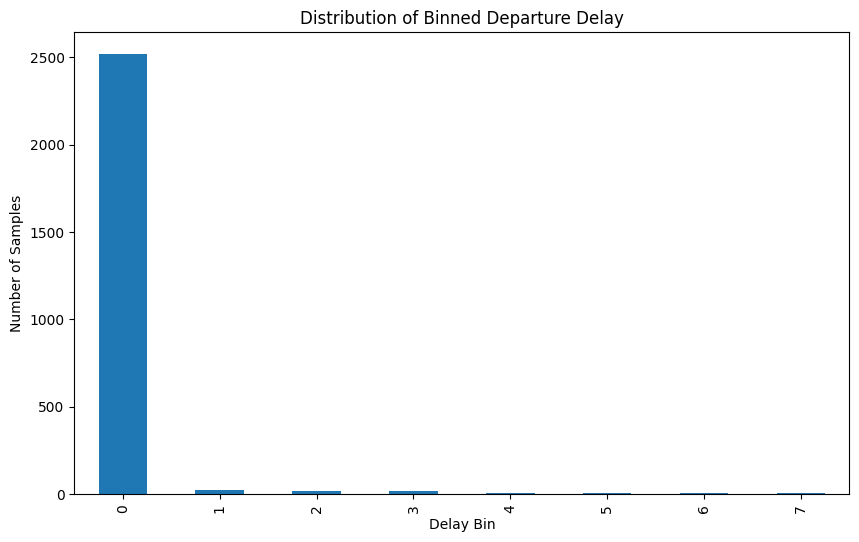

In [125]:
# Assuming 'departure_delay_binned' is your binned target variable
import matplotlib.pyplot as plt

# Value counts of each bin
bin_counts = df['departure_delay_binned'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar')
plt.title('Distribution of Binned Departure Delay')
plt.xlabel('Delay Bin')
plt.ylabel('Number of Samples')
plt.show()


In [127]:
# Identify columns with object data type
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Columns with object data types:", object_cols)


Columns with object data types: ['flight_number']


In [130]:
columns_to_drop = ['flight_number']
X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)


In [132]:
from imblearn.over_sampling import SMOTE

# Adjust k_neighbors to 1
smote = SMOTE(k_neighbors=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [133]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the resampled training set
y_train_pred = rf_model.predict(X_train_resampled)

# Evaluate performance on training data
print("Training Set Performance:")
print(classification_report(y_train_resampled, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred))


Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2016
           1       1.00      1.00      1.00      2016
           2       1.00      1.00      1.00      2016
           3       1.00      1.00      1.00      2016
           4       1.00      1.00      1.00      2016
           5       1.00      1.00      1.00      2016
           6       1.00      1.00      1.00      2016
           7       1.00      1.00      1.00      2016

    accuracy                           1.00     16128
   macro avg       1.00      1.00      1.00     16128
weighted avg       1.00      1.00      1.00     16128

Training Accuracy: 1.0


In [135]:
# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate performance on test data
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Test Set Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       1.00      0.12      0.22         8
           2       0.50      1.00      0.67         1
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.98       519
   macro avg       0.52      0.52      0.46       519
weighted avg       0.98      0.98      0.97       519

Test Accuracy: 0.9788053949903661


/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

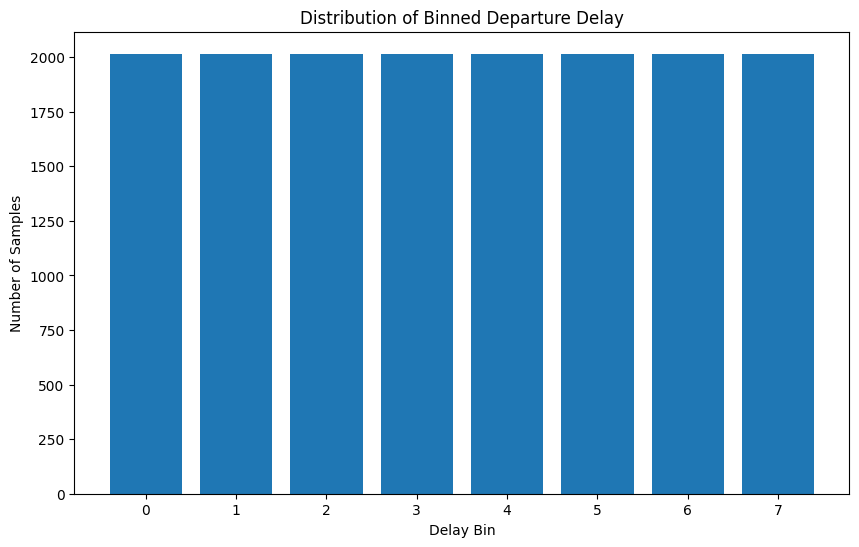

In [139]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'y_train_resampled' is a list of binned target variables
bin_counts = Counter(y_train_resampled)

# Convert the Counter object to a sorted list of tuples
sorted_bin_counts = sorted(bin_counts.items())

# Separate the bins and their counts for plotting
bins, counts = zip(*sorted_bin_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(bins, counts)
plt.title('Distribution of Binned Departure Delay')
plt.xlabel('Delay Bin')
plt.ylabel('Number of Samples')
plt.show()

In [140]:
# Check for overlap between training and test sets
overlap = X_train_resampled.index.intersection(X_test.index)
print(f"Number of overlapping samples: {len(overlap)}")


Number of overlapping samples: 142


In [141]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(
    rf_model, X_train_resampled, y_train_resampled, cv=skf, scoring='accuracy'
)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99690019 1.         1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9993800371977681


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       503
           1       1.00      0.12      0.22         8
           2       0.50      1.00      0.67         1
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.98       519
   macro avg       0.52      0.52      0.46       519
weighted avg       0.98      0.98      0.97       519



/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

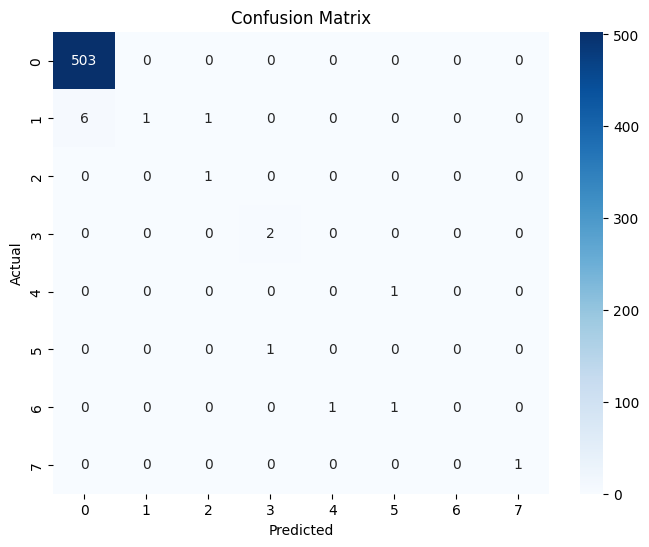

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [143]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

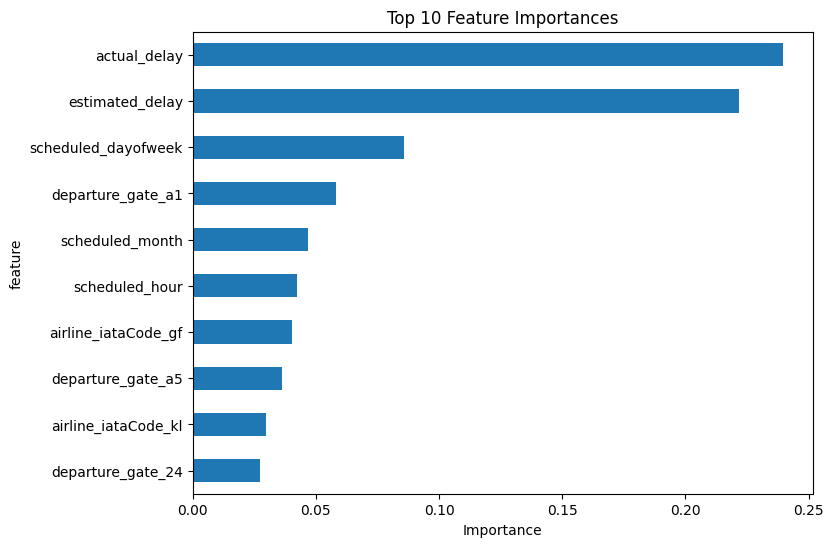

In [144]:
importances = rf_model.feature_importances_
feature_names = X_train_resampled.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot Top Features
feature_importance_df.head(10).plot(
    kind='barh', x='feature', y='importance', legend=False, figsize=(8,6)
)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()


In [145]:
from sklearn.metrics import roc_auc_score

y_test_proba = rf_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovo')
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9642590883271798


In [158]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [157]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 474.3 kB/s eta 0:00:00m eta 0:00:010:00:08
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 814.1 kB/s eta 0:00:00m eta 0:00:010:00:07


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       504
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.95       519
   macro avg       0.12      0.12      0.12       519
weighted avg       0.94      0.95      0.95       519



/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hashim/miniconda3/envs/ensemble/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

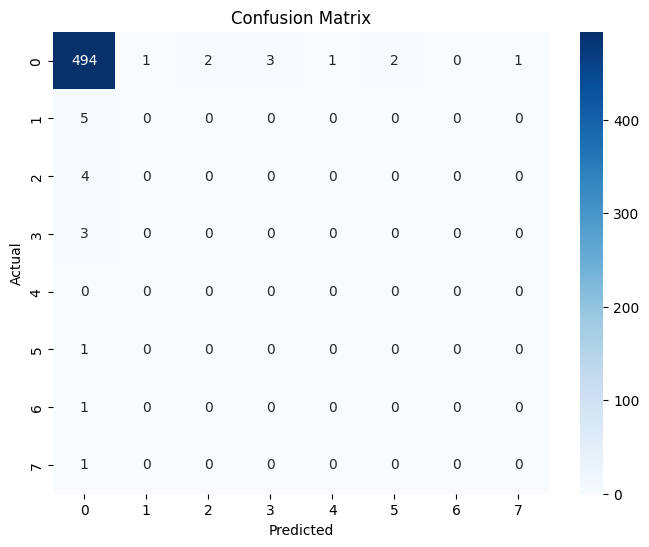

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [160]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=skf, scoring='f1_macro')
print("Cross-Validation F1 Scores:", cv_scores)

Cross-Validation F1 Scores: [0.99628371 1.         1.         1.         1.        ]
